# Comparing the Usefulness of Batting Stats

### I have heard about all kinds of stats that tells you the effectiveness of an offense, now I would like to assess and see which metric (out of BA, OBP, SLG, and wOBA, XBH, HR) contributes most to scoring runs, then I would like to see what amount of influence this has on wins

In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
from pybaseball import team_batting
from sklearn.linear_model import LinearRegression
from scipy import stats

# Constants

In [2]:
def test_postgres_connection():
    try:
        # Define connection parameters
        conn = psycopg2.connect(
            dbname="MLB_DATA",
            user="user",
            password="password",
            host="postgres",
            port="5432"
        )
        
        # Create a cursor and test the connection
        cur = conn.cursor()
        cur.execute("SELECT 1;")
        cur.fetchone()
        
        print("Connected to PostgreSQL successfully.")
        return 'success'  # Return the connection object if successful

    except psycopg2.Error as e:
        print("Error connecting to PostgreSQL:", e)
        raise  # raise error for error

# Test Connection to the Database

In [3]:
test_postgres_connection()

Connected to PostgreSQL successfully.


'success'

# I will pull hitter statistics grouped by team

In [3]:
def get_hitter_team_stats():
    data = team_batting(2015, 2024)


    return data

In [4]:
df = get_hitter_team_stats()


df.head(10)


,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,16,2023,ATL,29,2278,5597,6249,1543,920,293,...,121.2,1996,0.458,4355,0.140,0.256,NaN,NaN,NaN,40.3
1,16,2020,ATL,28,900,2074,2344,556,320,130,...,115.6,644,0.427,1509,0.147,0.271,NaN,NaN,NaN,12.5
2,21,2019,HOU,28,2309,5613,6394,1538,899,323,...,117.9,1604,0.355,4517,0.172,0.258,NaN,NaN,NaN,42.0
3,22,2020,LAD,27,921,2042,2316,523,302,97,...,113.1,695,0.438,1587,0.167,0.268,NaN,NaN,NaN,13.1
4,21,2017,HOU,28,2313,5611,6271,1581,977,346,...,114.6,1615,0.351,4605,0.173,0.257,NaN,NaN,NaN,37.2
5,25,2020,NYM,29,902,2023,2279,551,352,106,...,118.4,567,0.368,1539,0.150,0.262,NaN,NaN,NaN,10.3
6,8,2019,MIN,27,2320,5732,6392,1547,899,318,...,117.0,1762,0.396,4452,0.148,0.260,NaN,NaN,NaN,31.8
7,3,2016,BOS,28,2284,5670,6320,1598,1022,343,...,114.9,1609,0.353,4559,0.189,0.270,NaN,NaN,NaN,32.5
8,9,2019,NYY,28,2312,5583,6245,1493,880,290,...,120.6,1706,0.407,4190,0.165,0.277,NaN,NaN,NaN,30.6
9,14,2015,TOR,29,2337,5509,6231,1480,923,308,...,116.3,1624,0.364,4456,0.179,0.270,NaN,NaN,NaN,36.7


In [5]:
print(df.info())
print(df.describe())

# for col in df.columns:
#     print(col)

# filter out 2020 season for obv reasons

df = df[df['Season'] != 2020]

df['XBH'] = df['HR'] + df['2B'] + df['3B']  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 319 entries, teamIDfg to L-WAR
dtypes: float64(262), int64(54), object(3)
memory usage: 747.8+ KB
None
         teamIDfg      Season         Age            G           AB  \
count  300.000000   300.00000  300.000000   300.000000   300.000000   
mean    15.500000  2019.50000   28.073333  2222.246667  5137.466667   
std      8.669903     2.87708    0.745974   448.664901  1061.598943   
min      1.000000  2015.00000   26.000000   827.000000  1752.000000   
25%      8.000000  2017.00000   28.000000  2311.000000  5409.750000   
50%     15.500000  2019.50000   28.000000  2357.000000  5485.000000   
75%     23.000000  2022.00000   29.000000  2406.000000  5536.750000   
max     30.000000  2024.00000   30.000000  2597.000000  5770.000000   

                PA            H           1B          2B          3B  ...  \
count   300.000000   300.000000   300.000000  300.000000  300.000000  ...   
mean   5740.273333  12

Text(0.5, 1.0, 'Runs compared to BA by Team R=0.644')

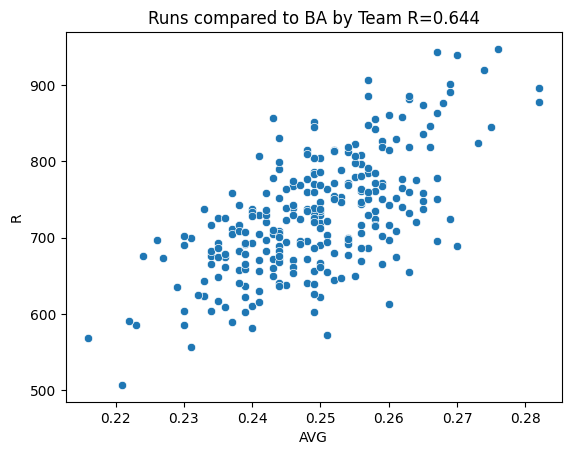

In [6]:

sns.scatterplot(data=df, x='AVG', y='R')

slope, intercept, r, p, std_err = stats.linregress(df['AVG'], df['R'])

plt.title(f'Runs compared to BA by Team R={round(r,3)}')
# print(f'y = {slo')

Text(0.5, 1.0, 'Runs compared to wOBA by Team R=0.927')

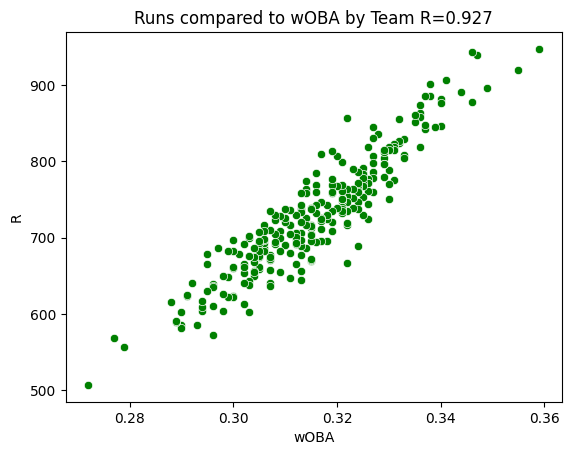

In [7]:

sns.scatterplot(data=df, x='wOBA', y='R', color='green')
slope, intercept, r, p, std_err = stats.linregress(df['wOBA'], df['R'])
plt.title(f'Runs compared to wOBA by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to HR by Team R=0.767')

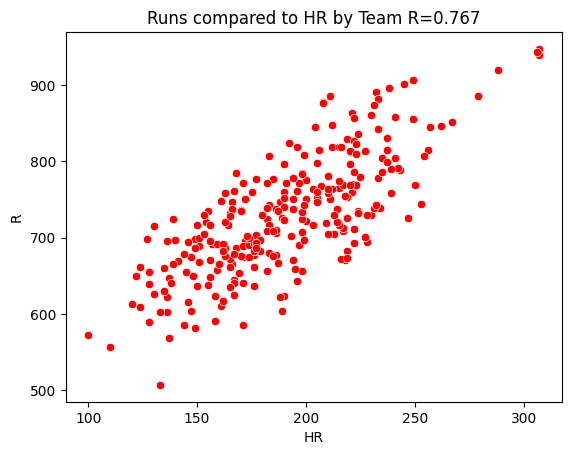

In [8]:
sns.scatterplot(data=df, x='HR', y='R', color='red')
slope, intercept, r, p, std_err = stats.linregress(df['HR'], df['R'])
plt.title(f'Runs compared to HR by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to OBP by Team R=0.854')

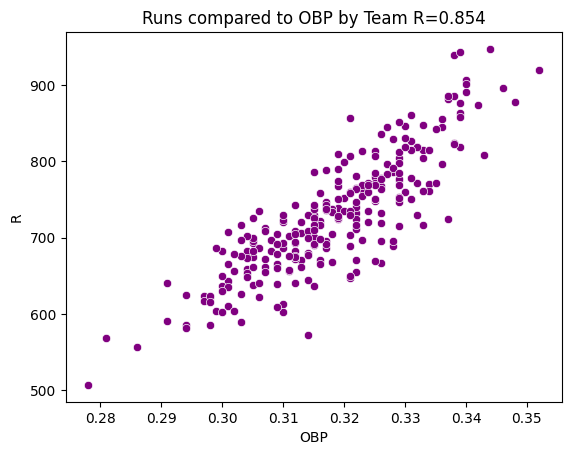

In [9]:
sns.scatterplot(data=df, x='OBP', y='R', color='purple')
slope, intercept, r, p, std_err = stats.linregress(df['OBP'], df['R'])
plt.title(f'Runs compared to OBP by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to SLG by Team R=0.912')

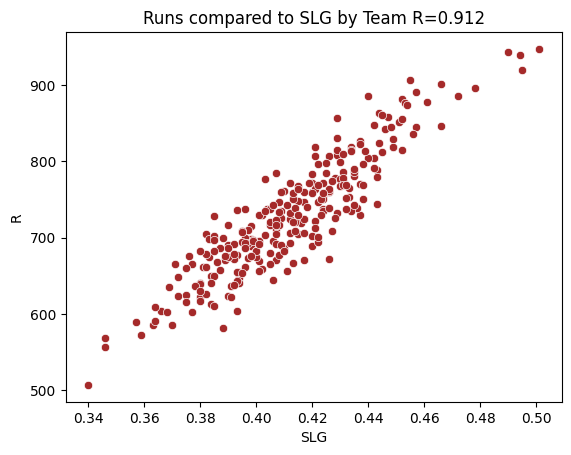

In [10]:
sns.scatterplot(data=df, x='SLG', y='R', color='brown')
slope, intercept, r, p, std_err = stats.linregress(df['SLG'], df['R'])
plt.title(f'Runs compared to SLG by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to OBP by Team R=0.933')

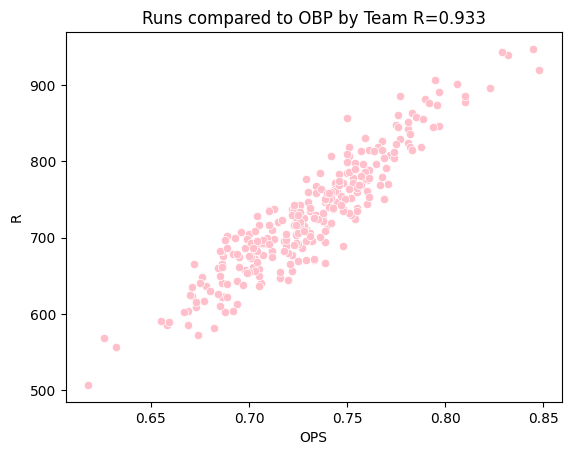

In [11]:
sns.scatterplot(data=df, x='OPS', y='R', color='pink')
slope, intercept, r, p, std_err = stats.linregress(df['OPS'], df['R'])
plt.title(f'Runs compared to OBP by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to XBH by Team R=0.879')

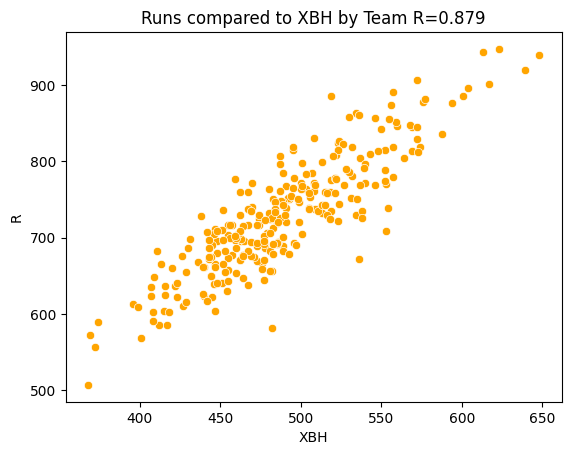

In [12]:
sns.scatterplot(data=df, x='XBH', y='R', color='orange')
slope, intercept, r, p, std_err = stats.linregress(df['XBH'], df['R'])
plt.title(f'Runs compared to XBH by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to BABIP by Team R=0.332')

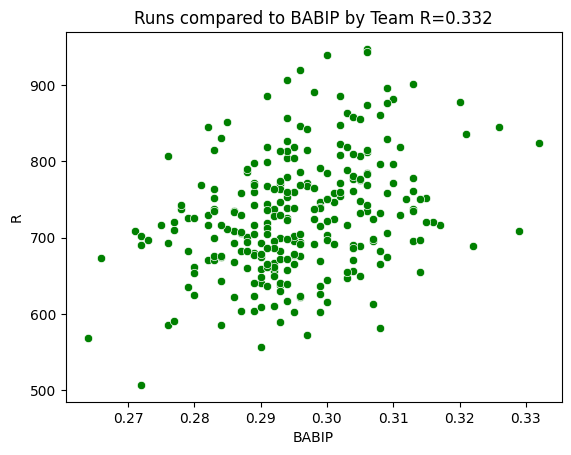

In [13]:
sns.scatterplot(data=df, x='BABIP', y='R', color='green')
slope, intercept, r, p, std_err = stats.linregress(df['BABIP'], df['R'])
plt.title(f'Runs compared to BABIP by Team R={round(r,3)}')



Text(0.5, 1.0, 'Runs compared to wRC by Team R=0.957')

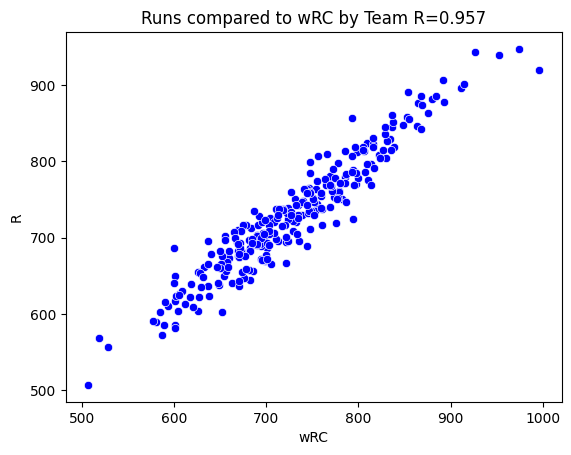

In [14]:
sns.scatterplot(data=df, x='wRC', y='R', color='blue')
slope, intercept, r, p, std_err = stats.linregress(df['wRC'], df['R'])
plt.title(f'Runs compared to wRC by Team R={round(r,3)}')

Text(0.5, 1.0, 'Runs compared to K% by Team R=-0.223')

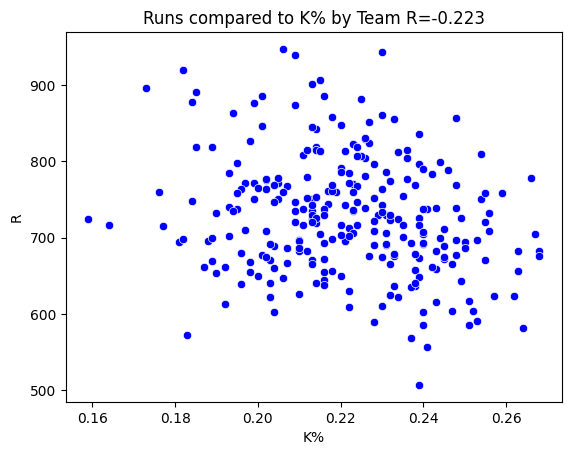

In [15]:
sns.scatterplot(data=df, x='K%', y='R', color='blue')
slope, intercept, r, p, std_err = stats.linregress(df['K%'], df['R'])
plt.title(f'Runs compared to K% by Team R={round(r,3)}')